In [1]:
%cd ..

/home/ltorres/leo/tesis/cloud-classification/code


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from torchvision.io import read_image
import glob
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from random import sample
import torch
import torch.nn as nn

In [5]:
from src.dataset import GCD
from src import config
from src import engine
from src import utils

from src.models.conv_nets import ResNet50

In [6]:
from sklearn.metrics import accuracy_score

In [7]:
device = config.DEVICE

#### Data loaders

In [8]:
path_train_images = utils.get_gcd_paths(config.DATA_DIR,'train')

In [9]:
train_dataset = GCD(path_train_images, resize=256)

train_loader = torch.utils.data.DataLoader(
        train_dataset,
        batch_size=config.BATCH_SIZE,
        num_workers=4,
        shuffle=True,
    )

In [10]:
batch = next(iter(train_loader))

In [11]:
path_test_images = utils.get_gcd_paths(config.DATA_DIR,'test')

test_dataset = GCD(path_test_images, resize=256)

test_loader = torch.utils.data.DataLoader(
        test_dataset,
        batch_size=config.BATCH_SIZE,
        num_workers=4,
        shuffle=False,
    )

### Data augmentation data loaders

In [20]:
augmentation_datasets = [
    GCD(utils.random_sample(path_train_images), resize=256, aug_types= atype)
    for atype in config.AUGMENTATION_TYPES
    ]

In [21]:
augmentation_loaders = [
    torch.utils.data.DataLoader(
            aug_dataset,
            batch_size=config.BATCH_SIZE,
            num_workers=4,
            shuffle=True,
        )
for aug_dataset in augmentation_datasets
]

#### Model

In [13]:
from torchvision import models

In [14]:
torch.cuda.empty_cache()

In [15]:
model = ResNet50(7).to(device)

In [16]:
criterion = nn.CrossEntropyLoss()
optimizer = optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)

In [24]:
save_filename='/gcd_resnet/model_params_26_03_22.pt'

In [25]:
best_accuracy=0
best_iteration=0
best_params={}


for e in range(config.EPOCHS):
    ### TRAIN DATASET
    preds, targets, loss = engine.train_fn(model, train_loader, criterion, optimizer, device=device)
    train_acc = accuracy_score(targets, preds)
    
    ### AUGMENTATION IMAGES
    for _loader in augmentation_loaders:
        engine.forward_backward_pass(model, _loader, criterion, optimizer, device=device)
    
    test_preds, test_targets, test_loss = engine.eval_fn(model, test_loader, criterion, device=device)
    test_acc = accuracy_score(test_targets, test_preds)
    
    if test_acc > best_accuracy:
        torch.save(model.state_dict(), config.SAVE_PATH+save_filename)
        print(f"Saved best parameters at epoch {e+1}")
        best_accuracy = test_acc
        best_iteration = e+1
        best_params = model.state_dict()
    
    print("EPOCH {}: Train acc: {:.2%} Train Loss: {:.4f} Test acc: {:.2%} Test Loss: {:.4f}".format(
        e+1,
        train_acc,
        loss,
        test_acc,
        test_loss
    ))


100%|██████████| 282/282 [00:16<00:00, 17.11it/s]


Saved best parameters at epoch 1
EPOCH 1: Train acc: 84.45% Train Loss: 0.4145 Test acc: 72.17% Test Loss: 0.9399


100%|██████████| 282/282 [00:16<00:00, 17.10it/s]


Saved best parameters at epoch 2
EPOCH 2: Train acc: 88.45% Train Loss: 0.3030 Test acc: 73.14% Test Loss: 0.8819


100%|██████████| 282/282 [00:16<00:00, 17.14it/s]


EPOCH 3: Train acc: 90.72% Train Loss: 0.2406 Test acc: 72.27% Test Loss: 1.2556


100%|██████████| 282/282 [00:16<00:00, 17.23it/s]


Saved best parameters at epoch 4
EPOCH 4: Train acc: 92.06% Train Loss: 0.2066 Test acc: 73.47% Test Loss: 0.9852


100%|██████████| 282/282 [00:16<00:00, 17.25it/s]


EPOCH 5: Train acc: 93.05% Train Loss: 0.1718 Test acc: 72.11% Test Loss: 1.3230


100%|██████████| 282/282 [00:16<00:00, 17.11it/s]


EPOCH 6: Train acc: 94.19% Train Loss: 0.1504 Test acc: 73.42% Test Loss: 0.9388


100%|██████████| 282/282 [00:16<00:00, 17.09it/s]


EPOCH 7: Train acc: 94.72% Train Loss: 0.1374 Test acc: 72.79% Test Loss: 1.1826


100%|██████████| 282/282 [00:16<00:00, 17.08it/s]


Saved best parameters at epoch 8
EPOCH 8: Train acc: 96.34% Train Loss: 0.1027 Test acc: 74.29% Test Loss: 0.8606


100%|██████████| 282/282 [00:16<00:00, 17.15it/s]


EPOCH 9: Train acc: 96.77% Train Loss: 0.0878 Test acc: 72.49% Test Loss: 1.2466


100%|██████████| 282/282 [00:16<00:00, 17.19it/s]


EPOCH 10: Train acc: 97.38% Train Loss: 0.0746 Test acc: 72.93% Test Loss: 1.0840


100%|██████████| 282/282 [00:16<00:00, 17.12it/s]


Saved best parameters at epoch 11
EPOCH 11: Train acc: 97.58% Train Loss: 0.0684 Test acc: 74.37% Test Loss: 1.1687


100%|██████████| 282/282 [00:16<00:00, 17.22it/s]


Saved best parameters at epoch 12
EPOCH 12: Train acc: 97.94% Train Loss: 0.0611 Test acc: 74.58% Test Loss: 1.1749


100%|██████████| 282/282 [00:16<00:00, 17.07it/s]


EPOCH 13: Train acc: 98.36% Train Loss: 0.0521 Test acc: 74.37% Test Loss: 1.0671


100%|██████████| 282/282 [00:16<00:00, 17.04it/s]


Saved best parameters at epoch 14
EPOCH 14: Train acc: 98.37% Train Loss: 0.0471 Test acc: 75.63% Test Loss: 0.8087


100%|██████████| 282/282 [00:16<00:00, 17.26it/s]


EPOCH 15: Train acc: 98.54% Train Loss: 0.0423 Test acc: 75.03% Test Loss: 1.1737


100%|██████████| 282/282 [00:16<00:00, 17.15it/s]


EPOCH 16: Train acc: 98.80% Train Loss: 0.0353 Test acc: 74.71% Test Loss: 1.0971


100%|██████████| 282/282 [00:16<00:00, 17.19it/s]


EPOCH 17: Train acc: 99.04% Train Loss: 0.0301 Test acc: 73.46% Test Loss: 1.1626


100%|██████████| 282/282 [00:16<00:00, 17.10it/s]


EPOCH 18: Train acc: 98.94% Train Loss: 0.0311 Test acc: 73.74% Test Loss: 1.1787


100%|██████████| 282/282 [00:16<00:00, 17.11it/s]


EPOCH 19: Train acc: 98.94% Train Loss: 0.0346 Test acc: 74.59% Test Loss: 0.9978


100%|██████████| 282/282 [00:16<00:00, 17.17it/s]


EPOCH 20: Train acc: 99.22% Train Loss: 0.0258 Test acc: 73.36% Test Loss: 0.9571


100%|██████████| 282/282 [00:16<00:00, 17.23it/s]


Saved best parameters at epoch 21
EPOCH 21: Train acc: 99.01% Train Loss: 0.0315 Test acc: 76.11% Test Loss: 0.9042


100%|██████████| 282/282 [00:16<00:00, 17.09it/s]


EPOCH 22: Train acc: 99.25% Train Loss: 0.0246 Test acc: 74.12% Test Loss: 1.1543


100%|██████████| 282/282 [00:16<00:00, 17.15it/s]


EPOCH 23: Train acc: 99.21% Train Loss: 0.0249 Test acc: 73.41% Test Loss: 1.0754


100%|██████████| 282/282 [00:16<00:00, 17.12it/s]


EPOCH 24: Train acc: 99.20% Train Loss: 0.0264 Test acc: 73.30% Test Loss: 1.3333


100%|██████████| 282/282 [00:16<00:00, 17.09it/s]

EPOCH 25: Train acc: 99.43% Train Loss: 0.0197 Test acc: 74.88% Test Loss: 0.9466


In [26]:
model.load_state_dict(torch.load(config.SAVE_PATH+save_filename))

<All keys matched successfully>

In [27]:
#torch.save(model.state_dict(), config.SAVE_PATH+'/gcd_resnet/model_params_25_03_22.pt')

In [28]:
test_preds, test_targets, test_loss = engine.eval_fn(model, test_loader, criterion, device=device)

100%|██████████| 282/282 [00:16<00:00, 17.09it/s]


In [29]:
accuracy_score(test_targets, test_preds)

0.7611111111111111

In [30]:
#torch.save(model.state_dict(), config.SAVE_PATH+'/gcd_resnet/model_params_25_03_22.pt')

---

### Accuracy per class and confusion matrix

In [31]:
class_mapper = {
    0: '1_cumulus',
    1: '2_altocumulus',
    2: '3_cirrus',
    3: '4_clearsky',
    4: '5_stratocumulus',
    5: '6_cumulonimbus',
    6: '7_mixed',
}

In [32]:
class_acc = dict()
matrix = np.zeros((7,7), dtype=int)

for i in range(7):
    pred_index = np.where(test_targets==i)[0]
    class_acc[class_mapper[i]] = accuracy_score(test_targets[pred_index], test_preds[pred_index])
    
    for j in test_preds[pred_index]:
        matrix[i,j]+=1 

In [33]:
class_acc

{'1_cumulus': 0.7386666666666667,
 '2_altocumulus': 0.48,
 '3_cirrus': 0.8419654714475432,
 '4_clearsky': 0.9666456891126495,
 '5_stratocumulus': 0.605586592178771,
 '6_cumulonimbus': 0.852589641434263,
 '7_mixed': 0.5403624382207578}

<AxesSubplot:title={'center':'Confusion Matrix (Accuracy %)'}>

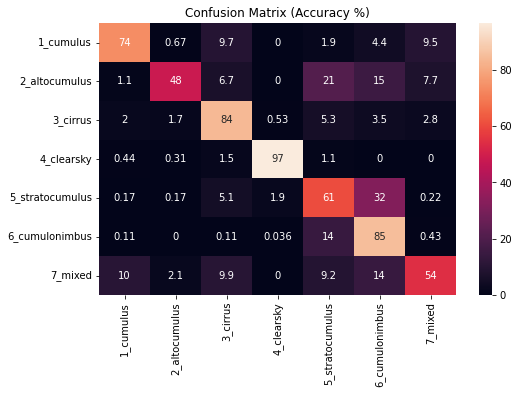

In [34]:
sum_of_rows = matrix.sum(axis=1)
conf_mat = 100*matrix / sum_of_rows[:, np.newaxis]

df_cm = pd.DataFrame(conf_mat, index = class_acc.keys(),
                  columns = class_acc.keys())

plt.figure(figsize = (8,5))
plt.title("Confusion Matrix (Accuracy %)")
sns.heatmap(df_cm, annot=True)